In [2]:
#credit card fraud detection
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

creditkart_data = pd.read_csv(r"C:\Users\smjn8\AppData\Local\Temp\630ce4cf-3615-41ba-803d-5cd0501e6d11_archive (8).zip.d11\creditcard.csv")
creditkart_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
missing_values = creditkart_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

class_counts = creditkart_data['Class'].value_counts()
print("\nClass distribution:\n", class_counts)

#Splitong the dataset into 0 or 1 class
normal = creditkart_data[creditkart_data['Class'] == 0]
fraud = creditkart_data[creditkart_data['Class'] == 1]

print("\nShape of normal transactions:", normal.shape)
print("Shape of fraudulent transactions:", fraud.shape)

print("\n'Amount' statistics for normal transactions:")
print(normal['Amount'].describe())
print("\n'Amount' statistics for fraudulent transactions:")
print(fraud['Amount'].describe())

normal_sample = normal.sample(n=492, random_state=42)  

# concating normal vs fake transaction
new_file = pd.concat([normal_sample, fraud], axis=0)

print("\nFirst 10 rows of the balanced dataset:")
print(new_file.head(10))

print("\nClass distribution in the balanced dataset:")
print(new_file['Class'].value_counts())

# seeing mean of variable in group 
print("\nMean of each feature grouped by Class:")
print(new_file.groupby('Class').mean())

# spliting data 
X = new_file.drop(columns='Class', axis=1) #target
Y = new_file['Class']  # Target 

print("\nFeatures (X) and target (Y):")
print(X.head(), Y.head())


Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Shape of normal transactions: (284315, 31)
Shape of fraudulent transactions: (492, 31)

'Amount' statistics for normal transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

'Amount' statistics for fraudulent transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%

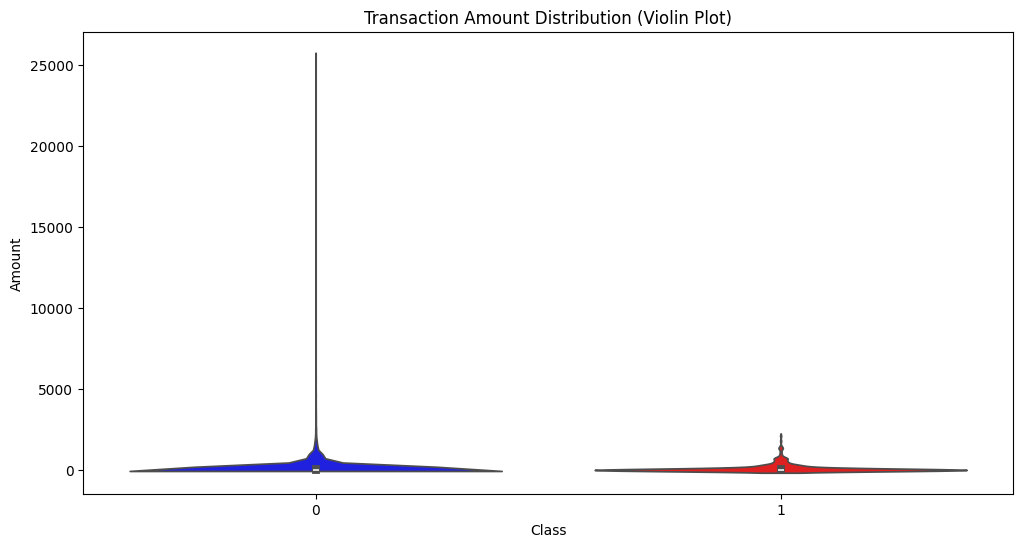

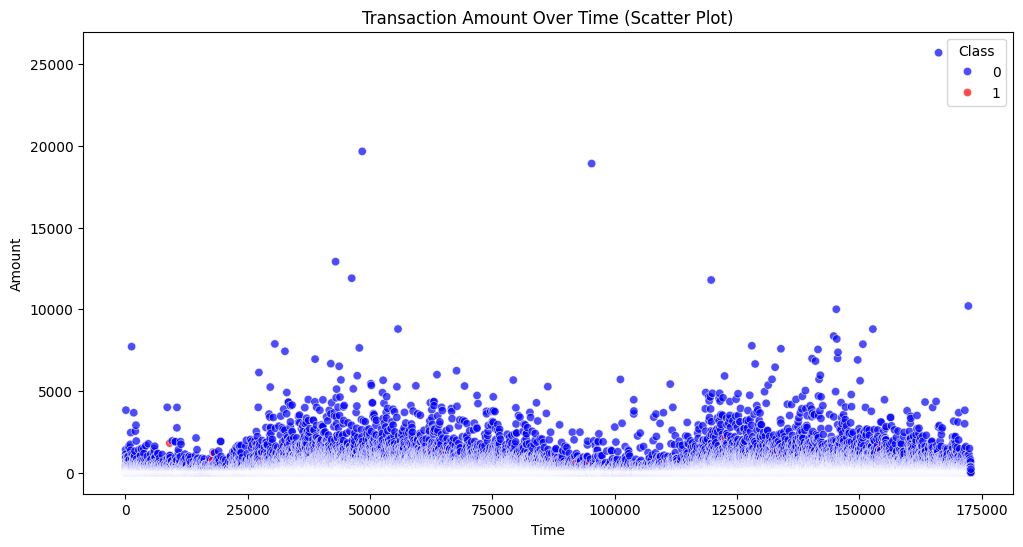

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for 'Amount' distribution for normal and fraudulent transactions
plt.figure(figsize=(12, 6))
sns.violinplot(x='Class', y='Amount', data=creditkart_data, hue='Class', palette=['blue', 'red'], legend=False)
plt.title('Transaction Amount Distribution (Violin Plot)')
plt.show()

# Scatter plot for 'Amount' vs 'Time'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=creditkart_data, x='Time', y='Amount', hue='Class', palette=['blue', 'red'], alpha=0.7)
plt.title('Transaction Amount Over Time (Scatter Plot)')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Train model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict and evaluate data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) * 100
print(f"Training Data Accuracy: {training_data_accuracy}%")

# Predict and evaluate on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) * 100
print(f"Test Data Accuracy: {test_data_accuracy}%")

Training Data Accuracy: 94.15501905972046%
Test Data Accuracy: 93.90862944162437%


D:\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
